In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
md = pd.read_csv("50_Startups.csv")

In [4]:
md.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

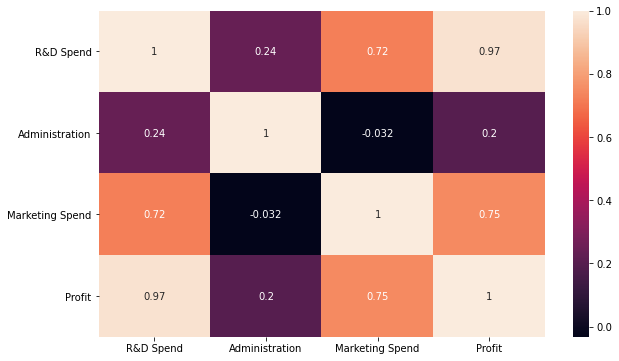

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(md.corr(),annot=True)
plt.show()

In [10]:
md.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [11]:
dummy = pd.get_dummies(md.State, drop_first = True)
dummy.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [13]:
md = pd.concat([md, dummy], axis =1)

In [14]:
md.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [15]:
md.drop(['State'], axis =1, inplace = True)

In [16]:
md.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
md_train, md_test = train_test_split(md, train_size = 0.7, test_size = 0.3, random_state = 100)